In [ ]:
import numpy as np
import random
import itertools
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import os
import pandas as pd 
import keras.metrics as metrics
from PIL import Image
from skimage.io import imread

import tensorflow as tf
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, concatenate
from tensorflow.keras.models import Sequential, save_model, load_model, Model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint
import keras.utils as utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3813997834288685870
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12020327390881678990
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

## Convert img to csv

In [ ]:
# Chroma
train_1_file = '/content/drive/MyDrive/EE3063_PROJECT/train/train_chroma.csv'
train_1_df = pd.read_csv(train_1_file, index_col=0)

# Mfcc
train_2_file = '/content/drive/MyDrive/EE3063_PROJECT/train/train_mfcc.csv'
train_2_df = pd.read_csv(train_2_file, index_col=0)

# Spectogram
train_3_file = '/content/drive/MyDrive/EE3063_PROJECT/train/train_spectogram.csv'
train_3_df = pd.read_csv(train_3_file, index_col=0)

In [ ]:
# Chroma
val_1_file = '/content/drive/MyDrive/EE3063_PROJECT/train/val_chroma.csv'
val_1_df = pd.read_csv(val_1_file, index_col=0)

# Mfcc
val_2_file = '/content/drive/MyDrive/EE3063_PROJECT/train/val_mfcc.csv'
val_2_df = pd.read_csv(val_2_file, index_col=0)

# Spectogram
val_3_file = '/content/drive/MyDrive/EE3063_PROJECT/train/val_spectogram.csv'
val_3_df = pd.read_csv(val_3_file, index_col=0)

In [ ]:
print(len(train_1_df.label))
print(len(val_3_df.label))

4692
800


## Convert

In [ ]:
IMAGE_SIZE = (224, 224)

In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/chroma/val/'
train_df = pd.DataFrame()

for i in range(500, 800):
  img = load_img(image_path + val_1_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[val_1_df.iloc[i,0]] = img[0].tolist()

train_df.to_csv('/content/drive/MyDrive/EE3063_PROJECT/train/data/val_chroma1.csv')

500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749


In [ ]:
print(train_df)

        valnega_500chroma.png  ...  valpos_135chroma.png
0                       255.0  ...                 255.0
1                       255.0  ...                 255.0
2                       255.0  ...                 255.0
3                       255.0  ...                 255.0
4                       255.0  ...                 255.0
...                       ...  ...                   ...
150523                  255.0  ...                 255.0
150524                  255.0  ...                 255.0
150525                  255.0  ...                 255.0
150526                  255.0  ...                 255.0
150527                  255.0  ...                 255.0

[150528 rows x 300 columns]


In [ ]:
train_df.to_csv('/content/drive/MyDrive/EE3063_PROJECT/train/data/train_chroma_neg2.csv')

In [ ]:
# 4692
for i in range(1000,2000):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[train_3_df.iloc[i,0]] = img[0].tolist()

In [ ]:
for i in range(2000,3000):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[train_3_df.iloc[i,0]] = img[0].tolist()

In [ ]:
train_df.to_csv('train_spectogram.csv')

In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/spectogram/train/'
train_df = pd.DataFrame()
for i in range(3000,4000):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[train_3_df.iloc[i,0]] = img[0].tolist()

In [ ]:
for i in range(4000,4692):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[train_3_df.iloc[i,0]] = img[0].tolist()

In [ ]:
train_df.to_csv('train_spectogram1.csv')

In [ ]:
print(train_df)

In [ ]:
train_1 = image


# Get label

In [ ]:
label = [0]*684 + [1]*489
label = np.array(label)
labels_train = tf.keras.utils.to_categorical(label, num_classes=2)
print(labels_train.shape)

(1173, 2)


In [ ]:
label = [0]*164 + [1]*136
label = np.array(label)
labels_val = tf.keras.utils.to_categorical(label, num_classes=2)
print(labels_val.shape)

(300, 2)


# Small test

In [ ]:
IMAGE_SIZE = (224, 224)
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/chroma/train/'
image = []

for i in range(2635,2835):
  img = load_img(image_path + train_1_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
train_1 = image

(200, 224, 224, 3)


In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/mfcc/train/'
image = []

for i in range(2635,2835):
  img = load_img(image_path + train_2_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
train_2 = image

(200, 224, 224, 3)


In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/spectogram/train/'
image = []

for i in range(2635,2835):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
train_3 = image

(200, 224, 224, 3)


In [ ]:
label_train = train_1_df.iloc[2635:2835,1].to_numpy()
labels_train = tf.keras.utils.to_categorical(label_train, num_classes=2)
print(labels_train.shape)

(200, 2)


In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/chroma/val/'
image = []

for i in range(654, 674):
  img = load_img(image_path + val_1_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
val_1 = image

(20, 224, 224, 3)


In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/mfcc/val/'
image = []

for i in range(654, 674):
  img = load_img(image_path + val_2_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
val_2 = image

(20, 224, 224, 3)


In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/spectogram/val/'
image = []

for i in range(654, 674):
  img = load_img(image_path + val_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img)
  image.append(img)

image = np.array(image)
print(image.shape)
val_3 = image

(20, 224, 224, 3)


In [ ]:
label_val = val_1_df.iloc[654:674,1].to_numpy()
labels_val = tf.keras.utils.to_categorical(label_val, num_classes=2)
print(labels_val)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Get data from csv files

In [ ]:
# train chroma
path1 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_chroma_neg4.csv'
path2 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_chroma_pos4.csv'

data1 = pd.read_csv(path1)
data1.drop('Unnamed: 0', inplace=True, axis=1)
print(data1)

data1 = data1.to_numpy()
data1 = data1.reshape(224,224,3,-1)
data1 = data1.transpose(3,0,1,2)

data2 = pd.read_csv(path2)
data2.drop('Unnamed: 0', inplace=True, axis=1)

data2 = data2.to_numpy()
data2 = data2.reshape(224,224,3,-1)
data2 = data2.transpose(3,0,1,2)

train_1 = np.concatenate((data1, data2), axis=0)
train_1 = train_1/255.
print(train_1.shape)

        trainnega_51chroma.png  ...  trainnega_734chroma.png
0                        255.0  ...                    255.0
1                        255.0  ...                    255.0
2                        255.0  ...                    255.0
3                        255.0  ...                    255.0
4                        255.0  ...                    255.0
...                        ...  ...                      ...
150523                   255.0  ...                    255.0
150524                   255.0  ...                    255.0
150525                   255.0  ...                    255.0
150526                   255.0  ...                    255.0
150527                   255.0  ...                    255.0

[150528 rows x 684 columns]
(1173, 224, 224, 3)


In [ ]:
# train mfcc
path1 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_mfcc_neg4.csv'
path2 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_mfcc_pos4.csv'

data1 = pd.read_csv(path1)
data1.drop('Unnamed: 0', inplace=True, axis=1)
print(data1)

data1 = data1.to_numpy()
data1 = data1.reshape(224,224,3,-1)
data1 = data1.transpose(3,0,1,2)

data2 = pd.read_csv(path2)
data2.drop('Unnamed: 0', inplace=True, axis=1)

data2 = data2.to_numpy()
data2 = data2.reshape(224,224,3,-1)
data2 = data2.transpose(3,0,1,2)

train_2 = np.concatenate((data1, data2), axis=0)
train_2 = train_2/255.
print(train_2.shape)

        trainnega_51mfcc.png  ...  trainnega_734mfcc.png
0                      255.0  ...                  255.0
1                      255.0  ...                  255.0
2                      255.0  ...                  255.0
3                      255.0  ...                  255.0
4                      255.0  ...                  255.0
...                      ...  ...                    ...
150523                 255.0  ...                  255.0
150524                 255.0  ...                  255.0
150525                 255.0  ...                  255.0
150526                 255.0  ...                  255.0
150527                 255.0  ...                  255.0

[150528 rows x 684 columns]
(1173, 224, 224, 3)


In [ ]:
# train spectogram
path1 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_spectogram_neg4.csv'
path2 = '/content/drive/MyDrive/EE3063_PROJECT/train/data/train_spectogram_pos4.csv'

data1 = pd.read_csv(path1)
data1.drop('Unnamed: 0', inplace=True, axis=1)
print(data1)

data1 = data1.to_numpy()
data1 = data1.reshape(224,224,3,-1)
data1 = data1.transpose(3,0,1,2)

data2 = pd.read_csv(path2)
data2.drop('Unnamed: 0', inplace=True, axis=1)

data2 = data2.to_numpy()
data2 = data2.reshape(224,224,3,-1)
data2 = data2.transpose(3,0,1,2)

train_3 = np.concatenate((data1, data2), axis=0)
train_3 = train_3/255.
print(train_3.shape)

        trainnega_51spectrogram.png  ...  trainnega_734spectrogram.png
0                             255.0  ...                         255.0
1                             255.0  ...                         255.0
2                             255.0  ...                         255.0
3                             255.0  ...                         255.0
4                             255.0  ...                         255.0
...                             ...  ...                           ...
150523                        255.0  ...                         255.0
150524                        255.0  ...                         255.0
150525                        255.0  ...                         255.0
150526                        255.0  ...                         255.0
150527                        255.0  ...                         255.0

[150528 rows x 684 columns]
(1173, 224, 224, 3)


In [ ]:
# Val chroma
path = '/content/drive/MyDrive/EE3063_PROJECT/train/data/val_chroma1.csv'

data1 = pd.read_csv(path)
data1.drop('Unnamed: 0', inplace=True, axis=1)
print(data1)
data1 = data1.to_numpy()
data1 = data1.reshape(224,224,3,-1)
data1 = data1.transpose(3,0,1,2)
data1= data1/255.
print(data1.shape)

        valnega_500chroma.png  ...  valpos_135chroma.png
0                       255.0  ...                 255.0
1                       255.0  ...                 255.0
2                       255.0  ...                 255.0
3                       255.0  ...                 255.0
4                       255.0  ...                 255.0
...                       ...  ...                   ...
150523                  255.0  ...                 255.0
150524                  255.0  ...                 255.0
150525                  255.0  ...                 255.0
150526                  255.0  ...                 255.0
150527                  255.0  ...                 255.0

[150528 rows x 300 columns]
(300, 224, 224, 3)


In [ ]:
# Val mfcc
path = '/content/drive/MyDrive/EE3063_PROJECT/train/data/val_mfcc1.csv'

data2 = pd.read_csv(path)
data2.drop('Unnamed: 0', inplace=True, axis=1)
print(data2)
data2 = data2.to_numpy()
data2 = data2.reshape(224,224,3,-1)
data2 = data2.transpose(3,0,1,2)
data2= data2/255.
print(data2.shape)

        valnega_500mfcc.png  ...  valpos_135mfcc.png
0                     255.0  ...               255.0
1                     255.0  ...               255.0
2                     255.0  ...               255.0
3                     255.0  ...               255.0
4                     255.0  ...               255.0
...                     ...  ...                 ...
150523                255.0  ...               255.0
150524                255.0  ...               255.0
150525                255.0  ...               255.0
150526                255.0  ...               255.0
150527                255.0  ...               255.0

[150528 rows x 300 columns]
(300, 224, 224, 3)


In [ ]:
# Val spectogram
path = '/content/drive/MyDrive/EE3063_PROJECT/train/data/val_spectogram1.csv'

data3 = pd.read_csv(path)
data3.drop('Unnamed: 0', inplace=True, axis=1)
print(data3)
data3 = data3.to_numpy()
data3 = data3.reshape(224,224,3,-1)
data3 = data3.transpose(3,0,1,2)
data3= data3/255.
print(data3.shape)

        valnega_500spectrogram.png  ...  valpos_135spectrogram.png
0                            255.0  ...                      255.0
1                            255.0  ...                      255.0
2                            255.0  ...                      255.0
3                            255.0  ...                      255.0
4                            255.0  ...                      255.0
...                            ...  ...                        ...
150523                       255.0  ...                      255.0
150524                       255.0  ...                      255.0
150525                       255.0  ...                      255.0
150526                       255.0  ...                      255.0
150527                       255.0  ...                      255.0

[150528 rows x 300 columns]
(300, 224, 224, 3)


## Check

In [ ]:
img1 = load_img(image_path + train_3_df.iloc[0,0], target_size=IMAGE_SIZE)
from matplotlib import pyplot as plt
plt.imshow(img1)
plt.show()
img2 = load_img(image_path + train_3_df.iloc[0,0], target_size=IMAGE_SIZE)
img2 = img_to_array(img2)
img = np.array([img1, img2])
print(img)

In [ ]:
image_path = '/content/drive/MyDrive/EE3063_PROJECT/train/image/spectogram/val/'
train_df = pd.DataFrame()

for i in range(0,1):
  img = load_img(image_path + train_3_df.iloc[i,0], target_size=IMAGE_SIZE)
  img = img_to_array(img).reshape(1,-1)
  print(i)
  train_df[train_3_df.iloc[i,0]] = img[0].tolist()

0


In [ ]:
train_df = train_df.to_numpy()

In [ ]:
print(train_df.shape)

(150528, 1)


In [ ]:
x = train_df.reshape(224,224,3,-1)

In [ ]:
print(x)

In [ ]:
y = x.transpose(3,0,1,2)

In [ ]:
print(y.shape)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


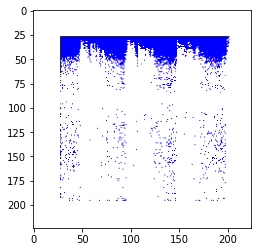

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(y[0])
plt.show()

# Model

In [ ]:
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same', input_shape=input_shape)(input_img)
  model = LeakyReLU(alpha=0.2)(model)
  model = MaxPooling2D((2, 2),padding='same', strides=2)(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.2)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same', strides=2)(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.2)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same', strides=2)(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(256, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.2)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same', strides=2)(model)
  model = Dropout(0.5)(model)

  model = tf.keras.layers.GlobalMaxPooling2D()(model)
    
  return model

In [ ]:
input_shape = (224, 224,3)
x1 = Input(shape=(224, 224, 3))
model1 = create_convolution_layers(x1)

x2 = Input(shape=(224, 224, 3))
model2 = create_convolution_layers(x2)

x3 = Input(shape=(224, 224, 3))
model3 = create_convolution_layers(x3)

conv = concatenate([model1, model2, model3])

dense = Dense(128, activation='relu')(conv)
dense = Dropout(0.5)(dense)

dense = Dense(64, activation='relu')(dense)
dense = Dropout(0.5)(dense)

dense = Dense(16, activation='relu')(dense)

output = Dense(2, activation='softmax')(dense)

model = Model(inputs=[x1, x2, x3], outputs=[output])


model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=metrics.AUC())

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                          

# Train

In [ ]:
checkpoint  = ModelCheckpoint('/content/drive/MyDrive/EE3063_PROJECT/train/best_model.h5', monitor='val_auc_1', mode='max', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
model.fit([train_1, train_2, train_3], labels_train,
          batch_size=2,
          epochs=8,
          verbose=1,
          validation_data=([data1, data2, data3], labels_val),
          shuffle=True,
          callbacks=callbacks_list)

# More Train

In [ ]:
filepath = "/content/drive/MyDrive/EE3063_PROJECT/train/best_model16.h5"
new_model = load_model(filepath)
checkpoint  = ModelCheckpoint('/content/drive/MyDrive/EE3063_PROJECT/train/best_model17.h5', monitor='val_auc_1', mode='max', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]
new_model.fit([train_1, train_2, train_3], labels_train,
          batch_size=2,
          epochs=8,
          verbose=1,
          validation_data=([data1, data2, data3], labels_val),
          shuffle=True,
          callbacks=callbacks_list)

Epoch 1/8
587/587 [==============================] - ETA: 0s - loss: 0.5748 - auc_1: 0.8059
Epoch 00001: val_auc_1 improved from -inf to 0.74203, saving model to /content/drive/MyDrive/EE3063_PROJECT/train/best_model22.h5
587/587 [==============================] - 63s 55ms/step - loss: 0.5748 - auc_1: 0.8059 - val_loss: 0.8589 - val_auc_1: 0.7420
Epoch 2/8
586/587 [============================>.] - ETA: 0s - loss: 0.5351 - auc_1: 0.8257
Epoch 00002: val_auc_1 did not improve from 0.74203
587/587 [==============================] - 30s 51ms/step - loss: 0.5351 - auc_1: 0.8257 - val_loss: 0.9158 - val_auc_1: 0.7365
Epoch 3/8
586/587 [============================>.] - ETA: 0s - loss: 0.5099 - auc_1: 0.8373
Epoch 00003: val_auc_1 did not improve from 0.74203
587/587 [==============================] - 30s 51ms/step - loss: 0.5101 - auc_1: 0.8371 - val_loss: 0.7260 - val_auc_1: 0.7334
Epoch 4/8
587/587 [==============================] - ETA: 0s - loss: 0.5185 - auc_1: 0.8509
Epoch 00004: val_